# **Weather Prediction - Kandy**

## Data Loading & Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/sri_lanka_weather_data.csv', index_col=0, parse_dates=['time'])

In [3]:
df.head()

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,shortwave_radiation_sum,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,20.92,...,0,11.7,27.4,20,4.58,7.0,79.899994,16,Sri Lanka,Colombo
2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,17.71,...,1,13.0,27.0,24,3.84,7.0,79.899994,16,Sri Lanka,Colombo
2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,17.76,...,3,12.3,27.4,16,3.65,7.0,79.899994,16,Sri Lanka,Colombo
2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,16.50,...,0,17.0,34.6,356,3.79,7.0,79.899994,16,Sri Lanka,Colombo
2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,23.61,...,0,18.7,37.1,355,4.97,7.0,79.899994,16,Sri Lanka,Colombo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147480 entries, 2010-01-01 to 2023-06-17
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   weathercode                 147480 non-null  int64  
 1   temperature_2m_max          147480 non-null  float64
 2   temperature_2m_min          147480 non-null  float64
 3   temperature_2m_mean         147480 non-null  float64
 4   apparent_temperature_max    147480 non-null  float64
 5   apparent_temperature_min    147480 non-null  float64
 6   apparent_temperature_mean   147480 non-null  float64
 7   sunrise                     147480 non-null  object 
 8   sunset                      147480 non-null  object 
 9   shortwave_radiation_sum     147480 non-null  float64
 10  precipitation_sum           147480 non-null  float64
 11  rain_sum                    147480 non-null  float64
 12  snowfall_sum                147480 non-null  int64  
 13

In [5]:
df.shape

(147480, 23)

In [6]:
df.dtypes

weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                        object
sunset                         object
shortwave_radiation_sum       float64
precipitation_sum             float64
rain_sum                      float64
snowfall_sum                    int64
precipitation_hours             int64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
et0_fao_evapotranspiration    float64
latitude                      float64
longitude                     float64
elevation                       int64
country                        object
city                           object
dtype: object

In [7]:
df['weathercode'] = df['weathercode'].astype('category')

In [8]:
df.isnull().sum()

weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
latitude                      0
longitude                     0
elevation                     0
country                       0
city                          0
dtype: int64

In [9]:
df.describe()

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
count,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.0,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000
mean,29.242367,23.899913,26.225590,34.112355,27.711096,30.317066,18.483513,5.975637,5.975637,0.0,8.762524,15.561288,34.796932,182.881625,3.896143,7.123334,80.263335,111.733333
std,2.120345,2.059291,1.842147,2.966144,2.835051,2.540275,4.214270,10.215294,10.215294,0.0,7.191010,6.213737,10.214372,93.670247,1.023126,0.798620,0.488871,266.380824
min,17.500000,12.100000,16.300000,18.500000,10.500000,16.300000,1.230000,0.000000,0.000000,0.0,0.000000,2.200000,11.500000,0.000000,0.420000,6.000000,79.800020,0.000000
25%,28.200000,23.100000,25.600000,32.400000,26.400000,29.200000,16.220000,0.400000,0.400000,0.0,2.000000,11.000000,26.600000,88.000000,3.260000,6.800003,79.899994,7.000000
50%,29.200000,24.300000,26.400000,34.200000,28.400000,30.800000,19.130000,2.600000,2.600000,0.0,8.000000,15.000000,33.100000,215.000000,3.890000,6.900002,80.000000,14.000000
75%,30.400000,25.200000,27.200000,36.100000,29.600000,31.900000,21.510000,7.500000,7.500000,0.0,14.000000,18.900000,41.800000,249.000000,4.550000,7.400002,80.399994,27.000000
max,37.500000,30.000000,31.800000,43.400000,34.700000,37.400000,28.980000,338.800000,338.800000,0.0,24.000000,50.200000,91.800000,360.000000,8.140000,9.700005,81.800020,1281.000000


In [10]:
for col in df.columns:
  print(f"{col}:{df[col].nunique()} unique values")

weathercode:10 unique values
temperature_2m_max:183 unique values
temperature_2m_min:175 unique values
temperature_2m_mean:144 unique values
apparent_temperature_max:224 unique values
apparent_temperature_min:225 unique values
apparent_temperature_mean:195 unique values
sunrise:42319 unique values
sunset:42407 unique values
shortwave_radiation_sum:2550 unique values
precipitation_sum:885 unique values
rain_sum:885 unique values
snowfall_sum:1 unique values
precipitation_hours:25 unique values
windspeed_10m_max:447 unique values
windgusts_10m_max:199 unique values
winddirection_10m_dominant:361 unique values
et0_fao_evapotranspiration:733 unique values
latitude:17 unique values
longitude:10 unique values
elevation:21 unique values
country:1 unique values
city:30 unique values


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['rain_sum'].max()

np.float64(338.8)

In [13]:
df['weathercode'].value_counts()

weathercode
51    37559
63    27477
61    22690
53    22308
2     10388
1      9438
55     7794
3      5877
65     2925
0      1024
Name: count, dtype: int64

In [14]:
df['city'].nunique()

30

In [15]:
df['city'].value_counts()

city
Colombo                      4916
Mount Lavinia                4916
Kesbewa                      4916
Moratuwa                     4916
Maharagama                   4916
Ratnapura                    4916
Kandy                        4916
Negombo                      4916
Sri Jayewardenepura Kotte    4916
Kalmunai                     4916
Trincomalee                  4916
Galle                        4916
Jaffna                       4916
Athurugiriya                 4916
Weligama                     4916
Matara                       4916
Kolonnawa                    4916
Gampaha                      4916
Puttalam                     4916
Badulla                      4916
Kalutara                     4916
Bentota                      4916
Matale                       4916
Mannar                       4916
Pothuhera                    4916
Kurunegala                   4916
Mabole                       4916
Hatton                       4916
Hambantota                   4916
Oruwala  

In [16]:
weather_kandy = df[df['city'] == 'Kandy']
weather_kandy.head()

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,shortwave_radiation_sum,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,2,25.3,18.7,22.0,27.2,20.3,23.8,2010-01-01T00:49,2010-01-01T12:32,18.09,...,0,15.3,38.9,57,3.43,7.300003,80.600006,510,Sri Lanka,Kandy
2010-01-02,2,25.6,19.4,22.2,28.4,21.6,24.8,2010-01-02T00:50,2010-01-02T12:32,15.47,...,0,13.3,33.1,46,2.95,7.300003,80.600006,510,Sri Lanka,Kandy
2010-01-03,51,25.0,19.5,22.1,28.2,22.1,25.0,2010-01-03T00:50,2010-01-03T12:33,14.99,...,1,10.7,28.1,40,2.84,7.300003,80.600006,510,Sri Lanka,Kandy
2010-01-04,51,25.3,19.0,21.9,27.7,21.3,24.3,2010-01-04T00:50,2010-01-04T12:33,16.55,...,2,10.4,29.2,23,3.16,7.300003,80.600006,510,Sri Lanka,Kandy
2010-01-05,1,25.0,16.3,20.8,28.0,17.5,22.6,2010-01-05T00:51,2010-01-05T12:34,22.68,...,0,9.7,27.0,28,4.18,7.300003,80.600006,510,Sri Lanka,Kandy


In [17]:
for col in weather_kandy.columns:
    print(f"{col}: {weather_kandy[col].nunique()} unique values")
    print(weather_kandy[col].unique())
    print("-------------------------------------------------------")


weathercode: 10 unique values
[2, 51, 1, 61, 63, 55, 0, 3, 53, 65]
Categories (10, int64): [0, 1, 2, 3, ..., 55, 61, 63, 65]
-------------------------------------------------------
temperature_2m_max: 123 unique values
[25.3 25.6 25.  24.8 25.4 25.1 26.9 26.5 27.  25.7 24.9 26.1 25.8 25.5
 26.  26.3 27.3 26.2 23.2 26.4 24.1 27.2 26.7 28.2 28.8 28.6 27.8 29.3
 29.  29.5 30.  29.8 29.6 30.2 30.6 31.1 31.3 31.7 31.8 31.5 32.2 31.2
 30.8 30.5 32.5 32.3 31.  29.2 31.4 33.  32.1 29.1 28.5 30.4 30.3 28.7
 29.7 29.4 27.4 28.9 27.7 28.3 28.1 28.4 27.9 26.6 27.6 27.1 27.5 25.2
 25.9 28.  24.7 26.8 23.8 24.2 24.4 24.5 24.3 22.5 22.2 22.9 23.  22.3
 21.7 21.4 22.4 24.  22.8 23.7 21.3 23.3 19.4 24.6 21.6 21.5 20.5 21.8
 23.9 30.1 30.9 29.9 30.7 23.6 22.7 23.4 23.1 23.5 32.9 32.  22.1 21.9
 22.  21.1 31.9 32.7 33.4 33.3 32.6 33.1 32.4 31.6 22.6]
-------------------------------------------------------
temperature_2m_min: 94 unique values
[18.7 19.4 19.5 19.  16.3 15.6 17.8 20.1 19.3 19.1 19.7 20.6 20

In [18]:
weather_kandy.describe()

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
count,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.0,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4.916000e+03,4.916000e+03,4916.0
mean,27.127807,20.628519,23.504740,30.951790,23.466497,26.687714,18.110138,6.313120,6.313120,0.0,7.391782,11.783666,34.999919,170.186737,3.569583,7.300003e+00,8.060001e+01,510.0
std,1.722015,1.391141,1.166783,2.390425,2.065381,1.671847,4.195949,13.306983,13.306983,0.0,6.270917,4.426484,10.370648,90.481482,0.870915,1.776538e-15,1.421230e-14,0.0
min,19.400000,14.200000,18.000000,21.800000,12.900000,19.800000,1.600000,0.000000,0.000000,0.0,0.000000,3.100000,14.800000,0.000000,0.500000,7.300003e+00,8.060001e+01,510.0
25%,26.100000,20.100000,22.800000,29.300000,22.800000,25.700000,15.960000,0.300000,0.300000,0.0,2.000000,8.000000,26.300000,64.000000,3.070000,7.300003e+00,8.060001e+01,510.0
50%,27.000000,20.900000,23.500000,30.800000,23.900000,26.600000,18.790000,2.200000,2.200000,0.0,7.000000,11.300000,32.800000,217.000000,3.660000,7.300003e+00,8.060001e+01,510.0
75%,28.100000,21.500000,24.200000,32.600000,24.700000,27.700000,20.970000,6.100000,6.100000,0.0,11.000000,15.500000,42.800000,225.000000,4.150000,7.300003e+00,8.060001e+01,510.0
max,33.400000,23.900000,27.900000,38.400000,28.600000,32.300000,28.120000,259.500000,259.500000,0.0,24.000000,24.300000,77.800000,359.000000,6.120000,7.300003e+00,8.060001e+01,510.0


## Data Cleaning & Preprocessing

In [19]:
#Handle missing values
weather_kandy=weather_kandy.dropna()

In [20]:
#Remove unwanted columns for both analysis and modeling
weather_kandy=weather_kandy.drop(columns=['sunrise','sunset', 'country', 'snowfall_sum', 'precipitation_hours', 'precipitation_sum', 'city', 'latitude', 'longitude', 'elevation', 'apparent_temperature_max', 'apparent_temperature_min'])

In [21]:
weather_kandy.index = pd.to_datetime(weather_kandy.index)

In [22]:
weather_kandy.head()

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_mean,shortwave_radiation_sum,rain_sum,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
time,,,,,,,,,,,
2010-01-01,2,25.3,18.7,22.0,23.8,18.09,0.0,15.3,38.9,57,3.43
2010-01-02,2,25.6,19.4,22.2,24.8,15.47,0.0,13.3,33.1,46,2.95
2010-01-03,51,25.0,19.5,22.1,25.0,14.99,0.1,10.7,28.1,40,2.84
2010-01-04,51,25.3,19.0,21.9,24.3,16.55,0.6,10.4,29.2,23,3.16
2010-01-05,1,25.0,16.3,20.8,22.6,22.68,0.0,9.7,27.0,28,4.18


In [23]:
weather_kandy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4916 entries, 2010-01-01 to 2023-06-17
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   weathercode                 4916 non-null   category
 1   temperature_2m_max          4916 non-null   float64 
 2   temperature_2m_min          4916 non-null   float64 
 3   temperature_2m_mean         4916 non-null   float64 
 4   apparent_temperature_mean   4916 non-null   float64 
 5   shortwave_radiation_sum     4916 non-null   float64 
 6   rain_sum                    4916 non-null   float64 
 7   windspeed_10m_max           4916 non-null   float64 
 8   windgusts_10m_max           4916 non-null   float64 
 9   winddirection_10m_dominant  4916 non-null   int64   
 10  et0_fao_evapotranspiration  4916 non-null   float64 
dtypes: category(1), float64(9), int64(1)
memory usage: 427.6 KB


In [24]:
weather_kandy.rename(columns={"rain_sum": "rainfall"}, inplace=True)
weather_kandy.rename(columns={"temperature_2m_mean": "mean_temperature"}, inplace=True)
weather_kandy.rename(columns={"temperature_2m_max": "max_temperature"}, inplace=True)
weather_kandy.rename(columns={"temperature_2m_min": "min_temperature"}, inplace=True)
weather_kandy.rename(columns={"windspeed_10m_max": "max_wind_speed"}, inplace=True)
weather_kandy.rename(columns={"windgusts_10m_max": "max_wind_gust"}, inplace=True)
weather_kandy.rename(columns={"winddirection_10m_dominant": "dominant_Wind_Direction"}, inplace=True)
weather_kandy.rename(columns={"shortwave_radiation_sum": "shortwave_radiation"}, inplace=True)
weather_kandy.rename(columns={"et0_fao_evapotranspiration": "evapotranspiration"}, inplace=True)

In [25]:
# 2.1 Check for unrealistic values
def check_realistic_values(df):
    # Temperature checks (Sri Lanka typically 25-35°C)
    temp_mask = (
        (weather_kandy['mean_temperature'] < 15) | (weather_kandy['mean_temperature'] > 40) |
        (weather_kandy['max_temperature'] < 15) | (weather_kandy['max_temperature'] > 45) |
        (weather_kandy['min_temperature'] < 10) | (weather_kandy['min_temperature'] > 35)
    )
    
    # Precipitation checks
    precip_mask = (weather_kandy['rainfall'] < 0) | (weather_kandy['rainfall'] > 500)
    
    print(f"Unrealistic temperature records: {temp_mask.sum()}")
    print(f"Unrealistic precipitation records: {precip_mask.sum()}")
    
    return weather_kandy[~temp_mask & ~precip_mask]

weather_kandy = check_realistic_values(weather_kandy)

# 2.2 Handle weather code inconsistencies
# WMO weather code interpretation: 0=clear, 1-3=partly cloudy, 45-48=fog, 
# 51-67=drizzle, 71-75=snow, 80-82=rain showers, 85-86=snow showers, 95-99=thunderstorm

Unrealistic temperature records: 0
Unrealistic precipitation records: 0


## Feature Engineering

In [26]:
 # Create binary target for rainfall prediction
weather_kandy['rain_today'] = weather_kandy["rainfall"].apply(lambda x: 0 if x == 0 else 1)
weather_kandy['rain_tomorrow'] = weather_kandy['rain_today'].shift(-1).astype('Int64')
weather_kandy = weather_kandy.ffill()

# #then drop the original rain_sum column
# weather_kandy = weather_kandy.drop(columns=['rainfall'])
weather_kandy = weather_kandy.drop(columns=['rain_today'])
weather_kandy


,weathercode,max_temperature,min_temperature,mean_temperature,apparent_temperature_mean,shortwave_radiation,rainfall,max_wind_speed,max_wind_gust,dominant_Wind_Direction,evapotranspiration,rain_tomorrow
time,,,,,,,,,,,,
2010-01-01,2,25.3,18.7,22.0,23.8,18.09,0.0,15.3,38.9,57,3.43,0
2010-01-02,2,25.6,19.4,22.2,24.8,15.47,0.0,13.3,33.1,46,2.95,1
2010-01-03,51,25.0,19.5,22.1,25.0,14.99,0.1,10.7,28.1,40,2.84,1
2010-01-04,51,25.3,19.0,21.9,24.3,16.55,0.6,10.4,29.2,23,3.16,0
2010-01-05,1,25.0,16.3,20.8,22.6,22.68,0.0,9.7,27.0,28,4.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-13,53,27.2,22.2,24.0,27.0,18.17,3.1,16.6,45.7,221,3.51,1
2023-06-14,53,26.9,22.5,24.4,27.3,18.26,4.0,16.8,42.5,218,3.56,1
2023-06-15,51,28.0,22.5,24.7,27.8,17.12,0.6,14.2,37.1,217,3.53,1


In [27]:
weather_kandy["year"] = weather_kandy.index.year
weather_kandy["month"] = weather_kandy.index.month
weather_kandy["day"] = weather_kandy.index.day


In [28]:
weather_kandy['year'].value_counts()

year
2012    366
2016    366
2020    366
2013    365
2011    365
2010    365
2015    365
2014    365
2018    365
2017    365
2019    365
2021    365
2022    365
2023    168
Name: count, dtype: int64

In [29]:
weather_kandy.to_csv('../data/processed/kandy_weather_cleaned.csv')

## Exploratory Data Analysis (EDA)

In [30]:
print("Rainfall Unique Values:", weather_kandy['rainfall'].nunique())
print("Missing rainfall values:", weather_kandy['rainfall'].isna().sum())
print(weather_kandy['rainfall'].value_counts())

Rainfall Unique Values: 437
Missing rainfall values: 0
rainfall
0.0     982
0.2     107
0.1     107
0.4      86
0.3      82
       ... 
53.1      1
21.4      1
71.2      1
29.2      1
45.0      1
Name: count, Length: 437, dtype: int64


In [31]:
weather_kandy['rainfall'].value_counts()

rainfall
0.0     982
0.2     107
0.1     107
0.4      86
0.3      82
       ... 
53.1      1
21.4      1
71.2      1
29.2      1
45.0      1
Name: count, Length: 437, dtype: int64

<Axes: title={'center': 'Daily Rainfall'}, xlabel='Year', ylabel='Rainfall (mm)'>

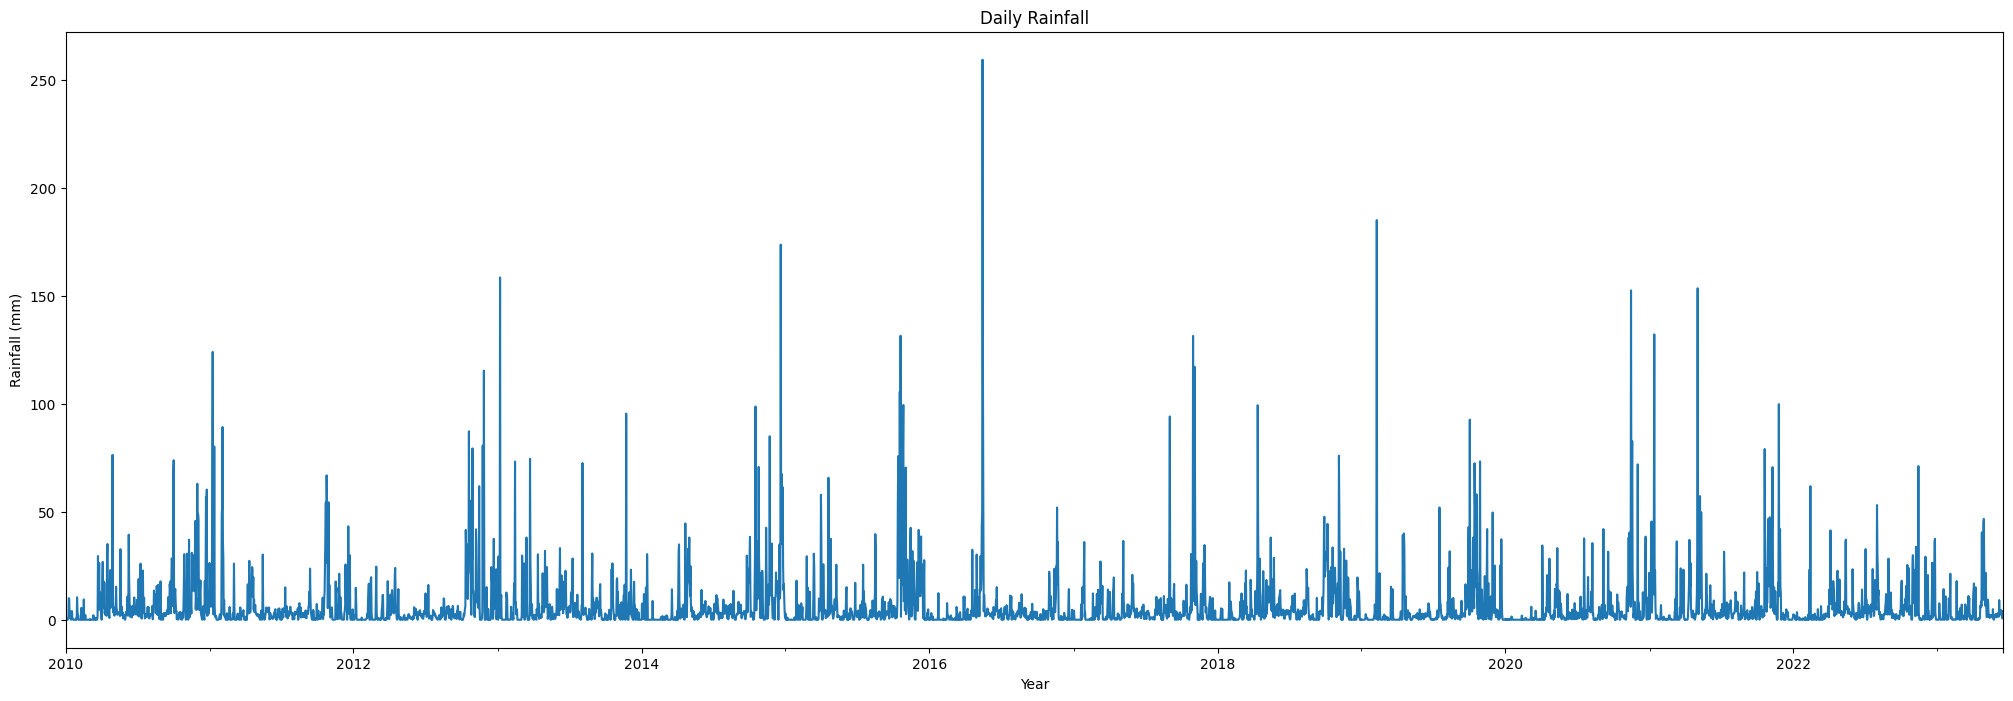

In [32]:
plt.figure(figsize=(25,8))

# First subplot - plot ON the current axis

weather_kandy["rainfall"].plot(title="Daily Rainfall", 
                              xlabel="Year", 
                              ylabel="Rainfall (mm)")


Text(0, 0.5, 'Total Rainfall')

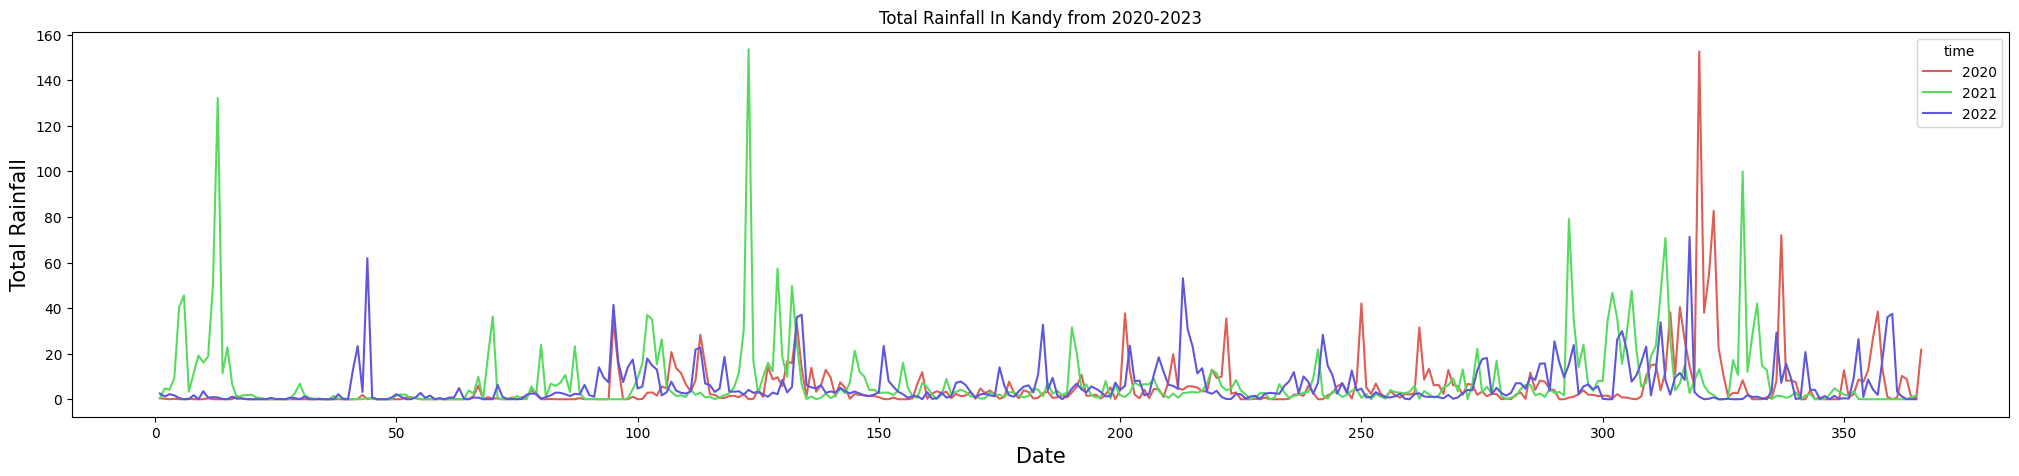

In [33]:
R = weather_kandy.loc['2020-01-01':'2022-12-31']['rainfall']
fig = plt.subplots(figsize=(25, 5))
palette = sns.color_palette("hls", 3)
sns.lineplot(x=R.index.dayofyear, 
             y=R, 
             hue=R.index.year,
            palette=palette,);
plt.title('Total Rainfall In Kandy from 2020-2023')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Rainfall', fontsize=15)

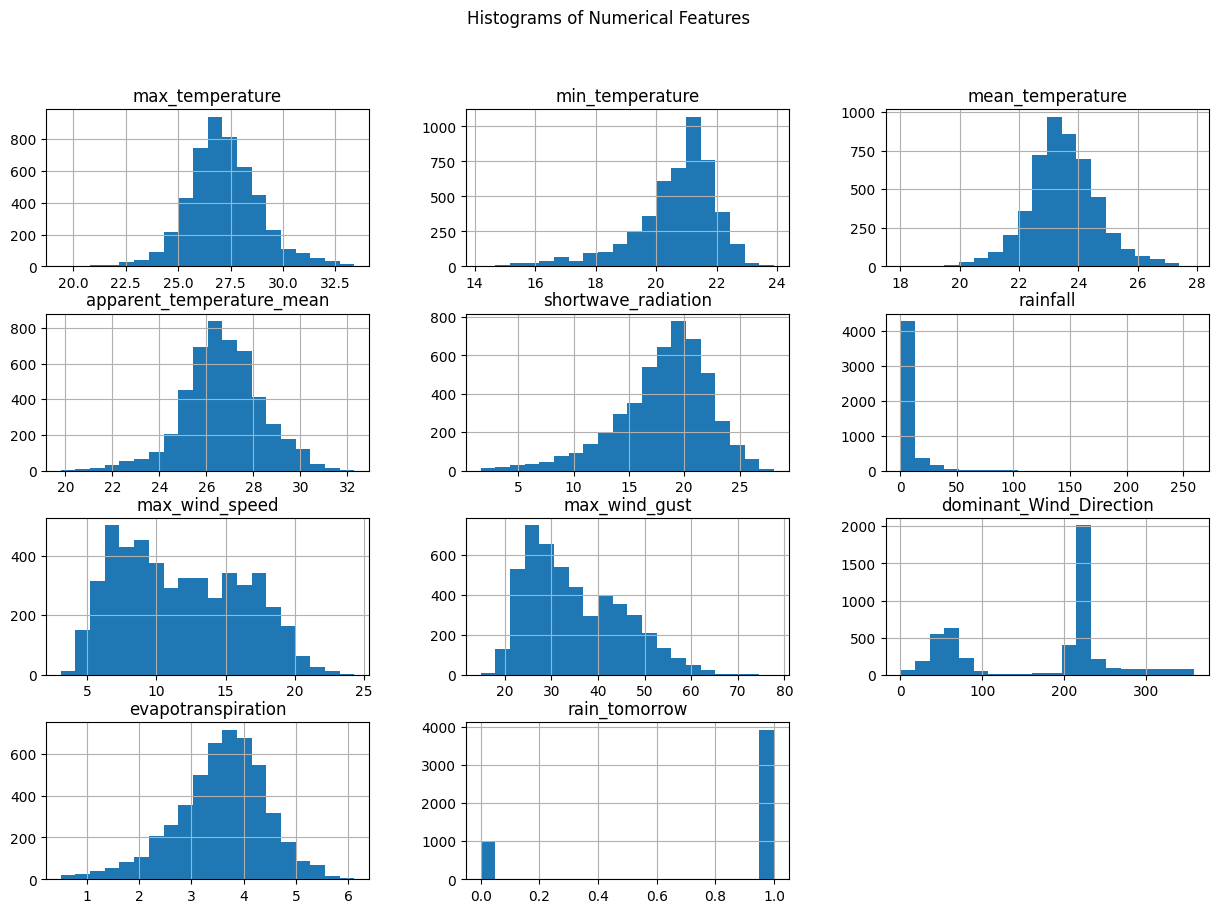

In [34]:
numerical_cols = weather_kandy.select_dtypes(include=['int64', 'float64','int16','float32']).columns
weather_kandy[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

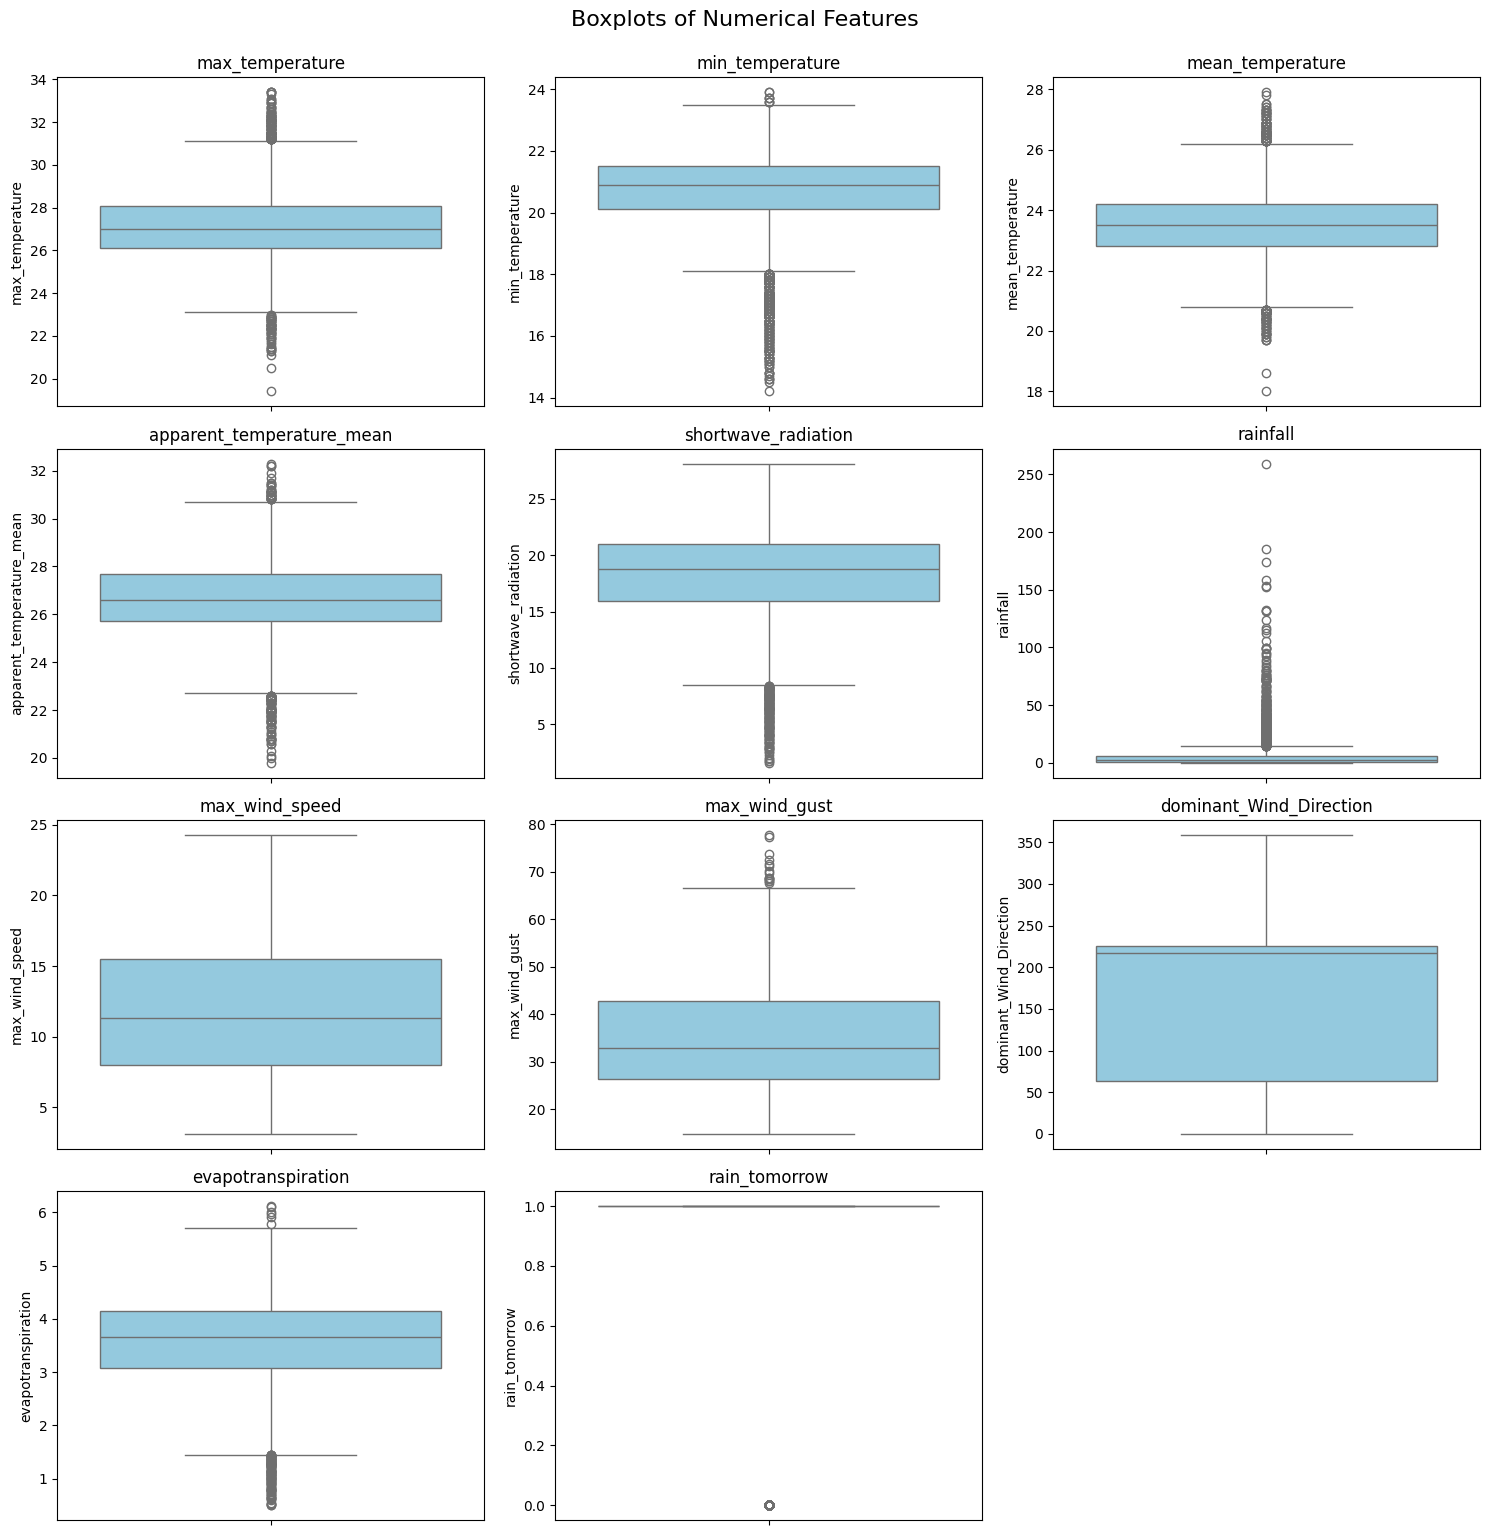

In [35]:
# Boxplots for each numerical column
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) // 3) + 1, 3, i)  # arrange in grid
    sns.boxplot(y=weather_kandy[col], color="skyblue")
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplots of Numerical Features", y=1.02, fontsize=16)
plt.show()

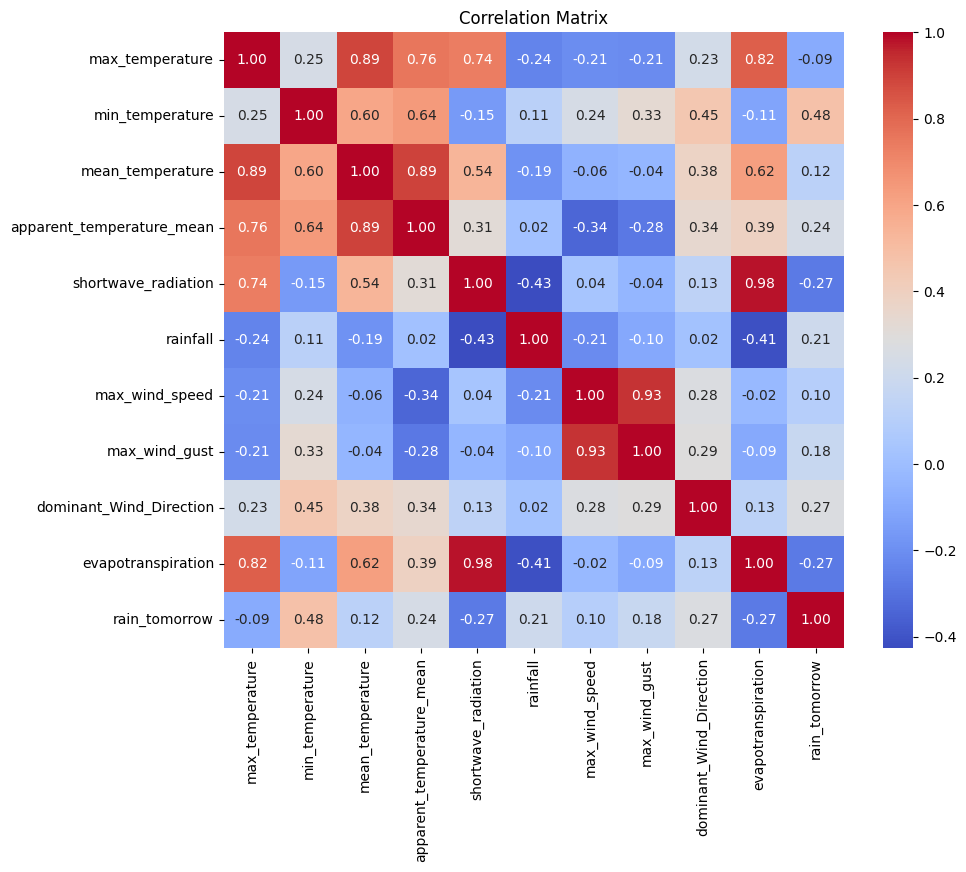

In [36]:
corr_matrix = weather_kandy[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [37]:
print(corr_matrix['rain_tomorrow'].sort_values(ascending=False))

rain_tomorrow                1.000000
min_temperature              0.480020
dominant_Wind_Direction      0.270328
apparent_temperature_mean    0.243253
rainfall                     0.205988
max_wind_gust                0.176189
mean_temperature             0.121564
max_wind_speed               0.098352
max_temperature             -0.089986
shortwave_radiation         -0.271672
evapotranspiration          -0.274542
Name: rain_tomorrow, dtype: float64


<Axes: title={'center': 'Mean Temperature Value Counts'}, xlabel='mean_temperature'>

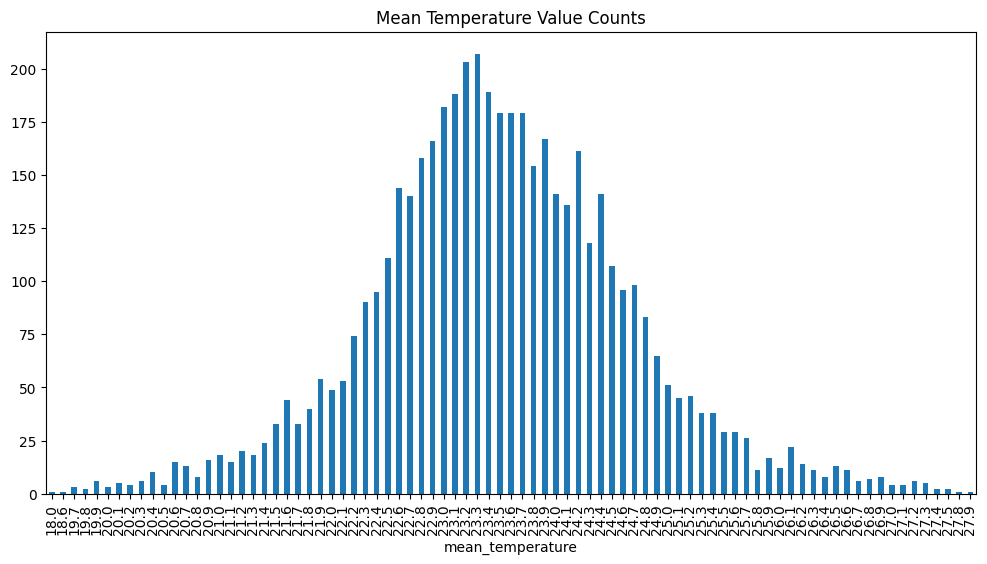

In [38]:
weather_kandy['mean_temperature'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), title='Mean Temperature Value Counts')

<Axes: title={'center': 'Daily Mean Temperature'}, xlabel='time'>

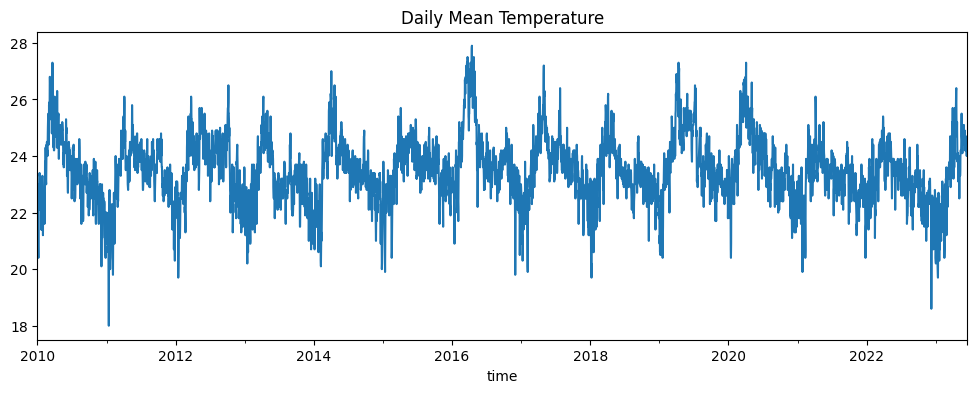

In [39]:
plt.figure(figsize=(25,8))
weather_kandy['mean_temperature'].plot(figsize=(12,4), title="Daily Mean Temperature")

In [40]:
weather_kandy.corr()

,weathercode,max_temperature,min_temperature,mean_temperature,apparent_temperature_mean,shortwave_radiation,rainfall,max_wind_speed,max_wind_gust,dominant_Wind_Direction,evapotranspiration,rain_tomorrow,year,month,day
weathercode,1.000000,-0.187700,0.545911,0.038984,0.261882,-0.448389,0.348790,0.020520,0.143580,0.253799,-0.456540,0.533698,-0.009345,0.263795,0.003701
max_temperature,-0.187700,1.000000,0.246255,0.891609,0.759472,0.736537,-0.238016,-0.205309,-0.211116,0.229245,0.823673,-0.089986,0.006383,-0.290549,-0.014828
min_temperature,0.545911,0.246255,1.000000,0.596739,0.639296,-0.154591,0.114612,0.243638,0.328347,0.451118,-0.114836,0.480020,-0.039318,0.128803,-0.007461
mean_temperature,0.038984,0.891609,0.596739,1.000000,0.894757,0.535751,-0.190872,-0.055999,-0.037483,0.378584,0.623807,0.121564,-0.007371,-0.187998,-0.011123
apparent_temperature_mean,0.261882,0.759472,0.639296,0.894757,1.000000,0.312687,0.019303,-0.342765,-0.280363,0.341560,0.391715,0.243253,0.003167,-0.091649,-0.009055
shortwave_radiation,-0.448389,0.736537,-0.154591,0.535751,0.312687,1.000000,-0.426425,0.037214,-0.036968,0.132507,0.982264,-0.271672,0.030450,-0.323059,-0.011972
rainfall,0.348790,-0.238016,0.114612,-0.190872,0.019303,-0.426425,1.000000,-0.210650,-0.098591,0.023606,-0.411971,0.205988,-0.027165,0.160274,0.000077
max_wind_speed,0.020520,-0.205309,0.243638,-0.055999,-0.342765,0.037214,-0.210650,1.000000,0.928677,0.275291,-0.022679,0.098352,-0.039955,0.120080,0.001542
max_wind_gust,0.143580,-0.211116,0.328347,-0.037483,-0.280363,-0.036968,-0.098591,0.928677,1.000000,0.290224,-0.094709,0.176189,-0.064038,0.143778,-0.009241
dominant_Wind_Direction,0.253799,0.229245,0.451118,0.378584,0.341560,0.132507,0.023606,0.275291,0.290224,1.000000,0.130524,0.270328,-0.042216,0.182213,-0.020693


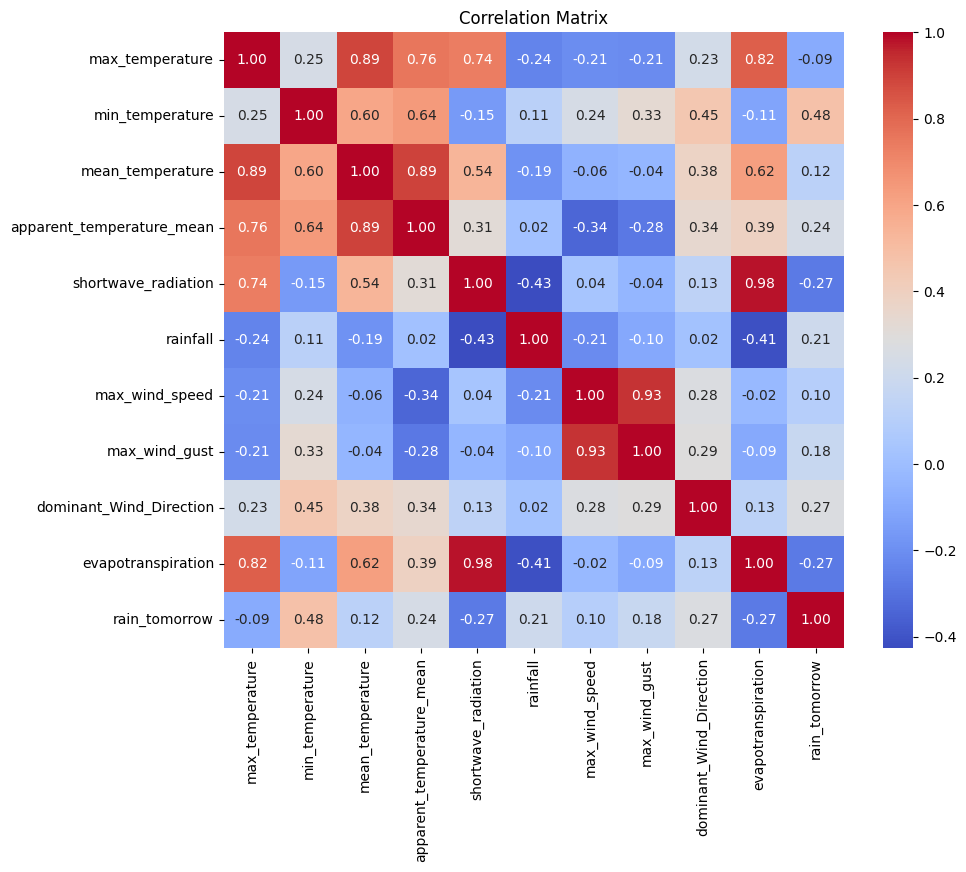

In [41]:
corr_matrix = weather_kandy[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [42]:
print(corr_matrix['mean_temperature'].sort_values(ascending=False))

mean_temperature             1.000000
apparent_temperature_mean    0.894757
max_temperature              0.891609
evapotranspiration           0.623807
min_temperature              0.596739
shortwave_radiation          0.535751
dominant_Wind_Direction      0.378584
rain_tomorrow                0.121564
max_wind_gust               -0.037483
max_wind_speed              -0.055999
rainfall                    -0.190872
Name: mean_temperature, dtype: float64


In [43]:
weather_kandy

,weathercode,max_temperature,min_temperature,mean_temperature,apparent_temperature_mean,shortwave_radiation,rainfall,max_wind_speed,max_wind_gust,dominant_Wind_Direction,evapotranspiration,rain_tomorrow,year,month,day
time,,,,,,,,,,,,,,,
2010-01-01,2,25.3,18.7,22.0,23.8,18.09,0.0,15.3,38.9,57,3.43,0,2010,1,1
2010-01-02,2,25.6,19.4,22.2,24.8,15.47,0.0,13.3,33.1,46,2.95,1,2010,1,2
2010-01-03,51,25.0,19.5,22.1,25.0,14.99,0.1,10.7,28.1,40,2.84,1,2010,1,3
2010-01-04,51,25.3,19.0,21.9,24.3,16.55,0.6,10.4,29.2,23,3.16,0,2010,1,4
2010-01-05,1,25.0,16.3,20.8,22.6,22.68,0.0,9.7,27.0,28,4.18,0,2010,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-13,53,27.2,22.2,24.0,27.0,18.17,3.1,16.6,45.7,221,3.51,1,2023,6,13
2023-06-14,53,26.9,22.5,24.4,27.3,18.26,4.0,16.8,42.5,218,3.56,1,2023,6,14
2023-06-15,51,28.0,22.5,24.7,27.8,17.12,0.6,14.2,37.1,217,3.53,1,2023,6,15


In [44]:
def remove_outliers(df, columns):
    df_clean = df.copy()
    
    for col in columns:
        if df_clean[col].dtype in ['int64', 'float64']:  # Only numeric columns
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            
            # Keep only rows within the IQR range
            df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
            
    return df_clean

In [45]:
numerical_cols = ['shortwave_radiation', 'mean_temperature', 'max_temperature', 'min_temperature', 'max_wind_speed', 'max_wind_gust', 'dominant_Wind_Direction', 'evapotranspiration', 'rainfall']
weather_kandy_no_outliers = remove_outliers(weather_kandy, numerical_cols)

In [46]:
weather_kandy_no_outliers.to_csv('../data/processed/kandy_weather_no_outliers.csv')